In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

CHHS_Path = "./Resources/CHHS_Vaccines_Administered_by_County/130d7ba2-b6eb-438d-a412-741bde207e1c (1).csv"
Census_Path = "./Resources/Census_Demo_Stats_by_County/ACSDP5Y2019.DP02_data_with_overlays_2021-08-05T001535.csv"
ROR_Path = "./Resources/California_Secretary_of_State_ROR/county.csv"

censusDemo_df = pd.read_csv(Census_Path)

#Fixes header for the census dataframe
newHeader = censusDemo_df.iloc[0]
censusDemo_df = censusDemo_df[1:]
censusDemo_df.columns = newHeader

CHHS_df = pd.read_csv(CHHS_Path)

caSOS_df = pd.read_csv(ROR_Path)

caSOS_df

,County,Eligible,Total Registered,Democratic,Republican,American Independent,Green,Libertarian,Peace and Freedom,Unknown,Other,No Party Preference
0,Alameda,"1,078,848","944,570","566,482","103,575","20,359","5,281","5,969","3,748",1,"5,495","233,660"
1,Percent,NaN,87.55%,59.97%,10.97%,2.16%,0.56%,0.63%,0.40%,0.00%,0.58%,24.74%
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alpine,921,907,394,218,47,7,18,2,1,3,217
4,Percent,NaN,98.48%,43.44%,24.04%,5.18%,0.77%,1.98%,0.22%,0.11%,0.33%,23.93%
...,...,...,...,...,...,...,...,...,...,...,...,...
173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,State Total,"24,834,943","22,078,290","10,264,695","5,309,040","710,259","88,011","212,686","109,963","118,865","132,121","5,132,650"
175,Percent,NaN,88.90%,46.49%,24.05%,3.22%,0.40%,0.96%,0.50%,0.54%,0.60%,23.25%
176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
countyList = ["Alameda", "Alpine", "Amador", "Butte", "Calaveras", "Colusa", "Contra Costa", "Del Norte", "El Dorado", "Fresno", 
              "Glenn", "Humboldt", "Imperial", "Inyo", "Kern", "Kings", "Lake", "Lassen", "Los Angeles", "Madera", 
              "Marin", "Mariposa", "Mendocino", "Merced", "Modoc", "Mono", "Monterey", "Napa", "Nevada", "Orange", "Placer", 
              "Plumas", "Riverside", "Sacramento", "San Benito", "San Bernardino", "San Diego", "San Francisco", "San Joaquin", 
              "San Luis Obispo", "San Mateo", "Santa Barbara", "Santa Clara", "Santa Cruz", "Shasta", "Sierra", "Siskiyou", "Solano", 
              "Sonoma", "Stanislaus", "Sutter", "Tehama", "Trinity", "Tulare", "Tuolumne", "Ventura", "Yolo", "Yuba"]

county_df = pd.DataFrame({"County" : []})

#add list of counties to dataframe
county_df["County"] = countyList

#remove numerical index and replace with county names
county_df.set_index("County", inplace = True)


In [50]:
#compile dataframe for use with plots 
for x in countyList:
    county_df.loc[x, "Total Population"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), 'Estimate!!ANCESTRY!!Total population'].sum()
    
    #data type for Total Pop needs to be cast as float instead of string to easily calc percentages
    county_df['Total Population'] = county_df["Total Population"].apply(pd.to_numeric, downcast = 'float')
    county_df.loc[x, "Total Fully Vaccinated"] = CHHS_df.loc[CHHS_df['county'] == x, "fully_vaccinated"].sum()
    county_df["% of Pop Fully Vaccinated"] = (county_df["Total Fully Vaccinated"] / county_df["Total Population"]) * 100
    
    county_df.loc[x, "Avg People per Household"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), 'Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average household size'].sum()
    county_df.loc[x, "Total Households"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), 'Estimate!!COMPUTERS AND INTERNET USE!!Total households'].sum()
    county_df.loc[x, "Household with one or more people under 18"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), "Percent!!HOUSEHOLDS BY TYPE!!Total households!!Households with one or more people under 18 years"].sum()
    
    county_df.loc[x, "Male Householder, No spouse/partner present"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), "Percent!!HOUSEHOLDS BY TYPE!!Total households!!Male householder, no spouse/partner present"].sum()
    county_df.loc[x, "Male Householder, No spouse/partner present, with children under 18"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), "Percent!!HOUSEHOLDS BY TYPE!!Total households!!Male householder, no spouse/partner present!!With own children of the householder under 18 years"].sum()
    county_df.loc[x, "Male Householder, Living Alone"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), "Percent!!HOUSEHOLDS BY TYPE!!Total households!!Male householder, no spouse/partner present!!Householder living alone"].sum()
    county_df.loc[x, "Male Householder, Living Alone, Over 65"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), "Percent!!HOUSEHOLDS BY TYPE!!Total households!!Male householder, no spouse/partner present!!Householder living alone!!65 years and over"].sum()
    
    
    county_df.loc[x, "Female Householder, No spouse/partner present"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), "Percent!!HOUSEHOLDS BY TYPE!!Total households!!Female householder, no spouse/partner present"].sum()
    county_df.loc[x, "Female Householder, No spouse/partner present, with children under 18"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), "Percent!!HOUSEHOLDS BY TYPE!!Total households!!Female householder, no spouse/partner present!!With own children of the householder under 18 years"].sum()
    county_df.loc[x, "Female Householder, Living Alone"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), "Percent!!HOUSEHOLDS BY TYPE!!Total households!!Female householder, no spouse/partner present!!Householder living alone"].sum()
    county_df.loc[x, "Female Householder, Living Alone, Over 65"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), "Percent!!HOUSEHOLDS BY TYPE!!Total households!!Female householder, no spouse/partner present!!Householder living alone!!65 years and over"].sum()
    
    county_df.loc[x, "Households with one or more people 65 and over"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), "Percent!!HOUSEHOLDS BY TYPE!!Total households!!Households with one or more people 65 years and over"].sum()
    county_df.loc[x, "Cohabiting Couple Household"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), "Percent!!HOUSEHOLDS BY TYPE!!Total households!!Cohabiting couple household"].sum()
    county_df.loc[x, "Cohabiting Couple Household, with children under 18"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), "Percent!!HOUSEHOLDS BY TYPE!!Total households!!Cohabiting couple household!!With own children of the householder under 18 years"].sum()
    county_df.loc[x, "Married Couple Household"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), "Percent!!HOUSEHOLDS BY TYPE!!Total households!!Married-couple family"].sum()
    county_df.loc[x, "Married Couple Household, with children under 18"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), "Percent!!HOUSEHOLDS BY TYPE!!Total households!!Married-couple family!!With own children of the householder under 18 years"].sum()
    
    
    county_df.loc[x, "Grandparents living w/ grandchildren under 18"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), 'Estimate!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years'].sum()
    #data type for grandparents needs to be cast as float instead of string to easily calc percentages
    county_df['Grandparents living w/ grandchildren under 18'] = county_df["Grandparents living w/ grandchildren under 18"].apply(pd.to_numeric, downcast = 'float')
    county_df["% of Pop with Grandparents living w/ grandchildren under 18"] = (county_df["Grandparents living w/ grandchildren under 18"] / county_df["Total Population"]) * 100
    
    county_df.loc[x, "% Households w/ Computer"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), 'Percent!!COMPUTERS AND INTERNET USE!!Total households!!With a computer'].sum()
    county_df.loc[x, "% Households w/ Broadband Internet Sub"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), 'Percent!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription'].sum()
    county_df.loc[x, "Education, People 25 years and over: % Less than 9th grade"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), 'Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade'].sum()
    county_df.loc[x, "Education, People 25 years and over: % 9th to 12th grade, no diploma"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), 'Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma'].sum()
    county_df.loc[x, "Education, People 25 years and over: % High school graduate (includes equivalency)"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), 'Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)'].sum()
    county_df.loc[x, "Education, People 25 years and over: % Some college, no degree"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), 'Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree'].sum()
    county_df.loc[x, "Education, People 25 years and over: % Associate's degree"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), "Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree"].sum()
    county_df.loc[x, "Education, People 25 years and over: % Bachelor's degree"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), "Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree"].sum()
    county_df.loc[x, "Education, People 25 years and over: % Graduate or professional degree"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), "Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree"].sum()
    county_df.loc[x, "Education, People 25 years and over: % High school graduate or higher"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), "Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate or higher"].sum()
    county_df.loc[x, "Civilian population 18 years and over: % Civilian Veterans"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), 'Percent!!VETERAN STATUS!!Civilian population 18 years and over!!Civilian veterans'].sum()
    county_df.loc[x, "% CIVILIAN NONINSTITUTIONALIZED POPULATION!!18 to 64 years!!With a disability"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), "Percent!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!18 to 64 years!!With a disability"].sum()
    county_df.loc[x, "% CIVILIAN NONINSTITUTIONALIZED POPULATION!!65 years and over!!With a disability"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), "Percent!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!65 years and over!!With a disability"].sum()
    county_df.loc[x, "% Population born outside the United States, Entered 2010 or later"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), "Percent!!YEAR OF ENTRY!!Population born outside the United States!!Foreign born!!Entered 2010 or later"].sum()
    
    #Voter Registration Pull by County
    county_df.loc[x, "Total Registered Voters"] = caSOS_df.loc[caSOS_df['County'] == x, 'Total Registered'].sum()
    county_df.loc[x, "Democratic"] = caSOS_df.loc[caSOS_df['County'] == x, 'Democratic'].sum()
    county_df.loc[x, "Republican"] = caSOS_df.loc[caSOS_df['County'] == x, 'Republican'].sum()
    county_df.loc[x, "American Independent"] = caSOS_df.loc[caSOS_df['County'] == x, 'American Independent'].sum()
    county_df.loc[x, "Green"] = caSOS_df.loc[caSOS_df['County'] == x, 'Green'].sum()
    county_df.loc[x, "Libertarian"] = caSOS_df.loc[caSOS_df['County'] == x, 'Libertarian'].sum()
    county_df.loc[x, "Peace and Freedom"] = caSOS_df.loc[caSOS_df['County'] == x, 'Peace and Freedom'].sum()
    county_df.loc[x, "No Party Preference"] = caSOS_df.loc[caSOS_df['County'] == x, 'No Party Preference'].sum()
    
    #Remove commas from dataframe so that it can be converted from string to float
    county_df = county_df.replace(',','', regex=True)
    county_df["% of Reg Voters: Democratic"] = (county_df["Democratic"].apply(pd.to_numeric, downcast = 'float') / county_df["Total Registered Voters"].apply(pd.to_numeric, downcast = 'float')) * 100
    county_df["% of Reg Voters: Republican"] = (county_df["Republican"].apply(pd.to_numeric, downcast = 'float') / county_df["Total Registered Voters"].apply(pd.to_numeric, downcast = 'float')) * 100
    county_df["% of Reg Voters: American Independent"] = (county_df["American Independent"].apply(pd.to_numeric, downcast = 'float') / county_df["Total Registered Voters"].apply(pd.to_numeric, downcast = 'float')) * 100
    county_df["% of Reg Voters: Green"] = (county_df["Green"].apply(pd.to_numeric, downcast = 'float') / county_df["Total Registered Voters"].apply(pd.to_numeric, downcast = 'float')) * 100
    county_df["% of Reg Voters: Libertarian"] = (county_df["Libertarian"].apply(pd.to_numeric, downcast = 'float') / county_df["Total Registered Voters"].apply(pd.to_numeric, downcast = 'float')) * 100
    county_df["% of Reg Voters: Peace and Freedom"] = (county_df["Peace and Freedom"].apply(pd.to_numeric, downcast = 'float') / county_df["Total Registered Voters"].apply(pd.to_numeric, downcast = 'float')) * 100
    county_df["% of Reg Voters: No Party Preference"] = (county_df["No Party Preference"].apply(pd.to_numeric, downcast = 'float') / county_df["Total Registered Voters"].apply(pd.to_numeric, downcast = 'float')) * 100
county_df



,Total Population,Total Fully Vaccinated,% of Pop Fully Vaccinated,Avg People per Household,Total Households,Household with one or more people under 18,"Male Householder, No spouse/partner present","Male Householder, No spouse/partner present, with children under 18","Male Householder, Living Alone","Male Householder, Living Alone, Over 65",...,Libertarian,Peace and Freedom,No Party Preference,% of Reg Voters: Democratic,% of Reg Voters: Republican,% of Reg Voters: American Independent,% of Reg Voters: Green,% of Reg Voters: Libertarian,% of Reg Voters: Peace and Freedom,% of Reg Voters: No Party Preference
County,,,,,,,,,,,,,,,,,,,,,
Alameda,1656754.0,1085847.0,65.540629,2.82,577177,33.6,17.1,1.1,10.7,3.0,...,5969,3748,233660,59.972474,10.965307,2.155372,0.559090,0.631928,0.396794,24.737182
Alpine,1039.0,689.0,66.313763,2.87,350,18.9,15.4,0.3,10.9,2.9,...,18,2,217,43.439912,24.035281,5.181918,0.771775,1.984564,0.220507,23.925028
Amador,38429.0,15481.0,40.284681,2.38,14594,24.1,16.4,0.4,12.0,5.1,...,435,81,4660,27.927516,46.520481,4.926146,0.392112,1.656007,0.308360,17.740216
Butte,225817.0,88630.0,39.248595,2.57,85320,26.7,19.2,1.2,11.8,4.1,...,1819,566,25838,35.405138,35.687403,4.377502,0.572504,1.450396,0.451305,20.602166
Calaveras,45514.0,18304.0,40.216197,2.66,16942,21.0,18.8,2.1,12.9,7.2,...,583,110,5745,26.880825,46.210578,5.208912,0.481392,1.799050,0.339443,17.728198
Colusa,21454.0,8758.0,40.822224,2.94,7227,42.0,15.2,2.0,9.6,5.0,...,127,51,2179,32.014388,40.767386,3.337330,0.219824,1.268985,0.509592,21.772582
Contra Costa,1142251.0,751992.0,65.834217,2.87,394769,35.8,13.8,1.2,8.8,3.0,...,5951,2787,160168,53.198075,18.571831,3.172105,0.395275,0.842206,0.394426,22.667518
Del Norte,27495.0,9385.0,34.133479,2.47,9945,29.8,19.5,2.3,13.0,4.9,...,207,92,3312,30.049062,39.397809,5.235567,0.645205,1.391223,0.618321,22.259560
El Dorado,188563.0,93938.0,49.817833,2.63,70974,27.4,15.1,0.9,10.4,4.0,...,2437,397,28376,30.996144,40.572690,4.571499,0.480026,1.769777,0.288306,20.606967


In [4]:
#function for scatter plot and linear regression
def plotScatterLinearRegression(xValues, yValues, title, xLabel, yLabel, textCoordinates):
    
    #regression formula
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
    regressValues = xValues * slope + intercept
    lineEquation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    #scatter plot and regression line plot
    plt.scatter(xValues, yValues, edgecolor = "orange")
    plt.plot(xValues, regressValues, "r-", color = "red")
    plt.annotate(lineEquation, textCoordinates, fontsize = 13, color = "red")
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.title(title)
    print(f"R-squared = {round(rvalue,2)}")
    plt.grid()
    plt.show()

R-squared = 0.15


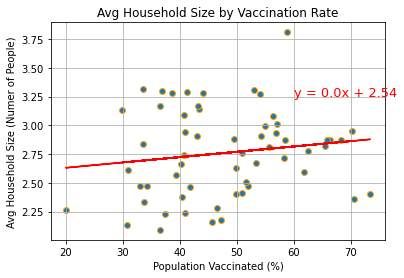

In [5]:
#Avg Household Size by Vaccination Rate
percentFullVaccinated = county_df["% of Pop Fully Vaccinated"]
avgPeopleHouse = county_df["Avg People per Household"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, avgPeopleHouse, "Avg Household Size by Vaccination Rate", "Population Vaccinated (%)", "Avg Household Size (Numer of People)", (60,3.25))

R-squared = 0.65


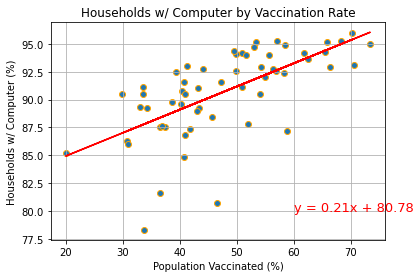

In [6]:
#
yValueScatter = county_df["% Households w/ Computer"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "Households w/ Computer by Vaccination Rate", "Population Vaccinated (%)", "Households w/ Computer (%)", (60,80))

R-squared = 0.01


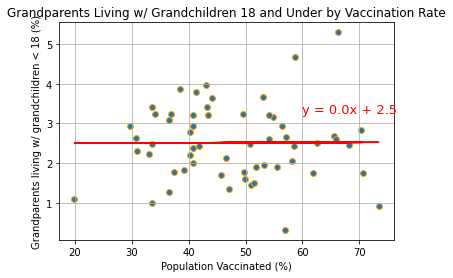

In [7]:
#% of Pop with Grandparents living w/ grandchildren under 18 by Vaccination Rate
yValueScatter = county_df["% of Pop with Grandparents living w/ grandchildren under 18"]

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "Grandparents Living w/ Grandchildren 18 and Under by Vaccination Rate", "Population Vaccinated (%)", "Grandparents living w/ grandchildren < 18 (%)", (60,3.25))

R-squared = 0.68


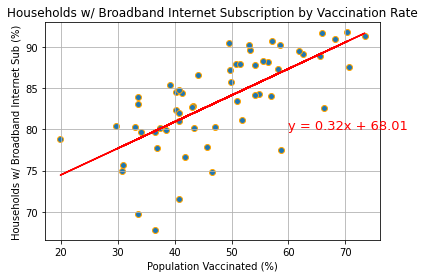

In [8]:
#
yValueScatter = county_df["% Households w/ Broadband Internet Sub"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "Households w/ Broadband Internet Subscription by Vaccination Rate", "Population Vaccinated (%)", "Households w/ Broadband Internet Sub (%)", (60,80))

R-squared = -0.07


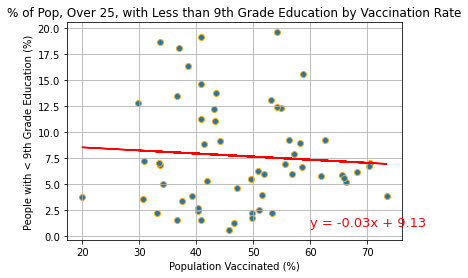

In [9]:
#
yValueScatter = county_df["Education, People 25 years and over: % Less than 9th grade"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% of Pop, Over 25, with Less than 9th Grade Education by Vaccination Rate", "Population Vaccinated (%)", "People with < 9th Grade Education (%)", (60,1))

R-squared = -0.63


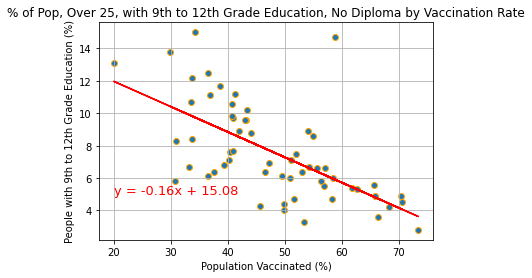

In [10]:
#
yValueScatter = county_df["Education, People 25 years and over: % 9th to 12th grade, no diploma"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% of Pop, Over 25, with 9th to 12th Grade Education, No Diploma by Vaccination Rate", "Population Vaccinated (%)", "People with 9th to 12th Grade Education (%)", (20,5))

R-squared = -0.78


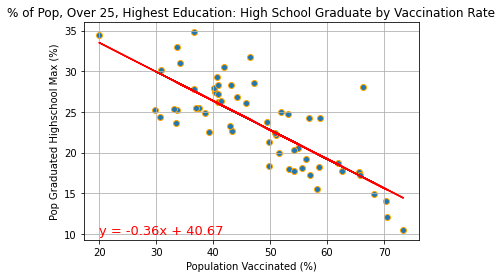

In [11]:
#
yValueScatter = county_df["Education, People 25 years and over: % High school graduate (includes equivalency)"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% of Pop, Over 25, Highest Education: High School Graduate by Vaccination Rate", "Population Vaccinated (%)", "Pop Graduated Highschool Max (%)", (20,10))

R-squared = -0.63


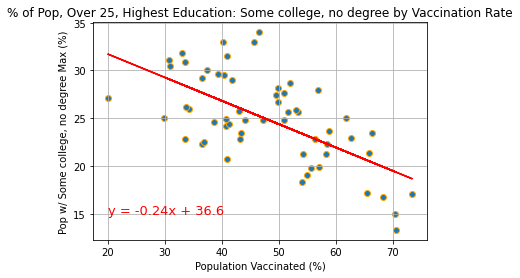

In [12]:
#
yValueScatter = county_df["Education, People 25 years and over: % Some college, no degree"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% of Pop, Over 25, Highest Education: Some college, no degree by Vaccination Rate", "Population Vaccinated (%)", "Pop w/ Some college, no degree Max (%)", (20,15))

R-squared = -0.46


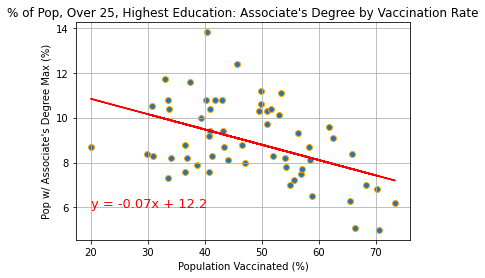

In [13]:
#
yValueScatter = county_df["Education, People 25 years and over: % Associate's degree"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% of Pop, Over 25, Highest Education: Associate's Degree by Vaccination Rate", "Population Vaccinated (%)", "Pop w/ Associate's Degree Max (%)", (20,6))

R-squared = 0.84


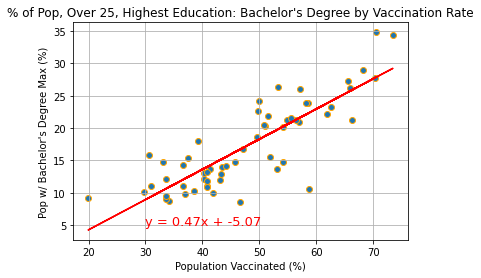

In [14]:
#
yValueScatter = county_df["Education, People 25 years and over: % Bachelor's degree"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% of Pop, Over 25, Highest Education: Bachelor's Degree by Vaccination Rate", "Population Vaccinated (%)", "Pop w/ Bachelor's Degree Max (%)", (30,5))

R-squared = 0.84


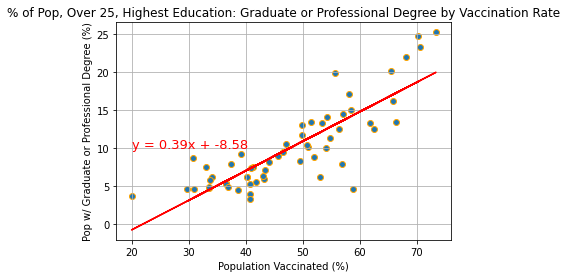

In [15]:
#
yValueScatter = county_df["Education, People 25 years and over: % Graduate or professional degree"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% of Pop, Over 25, Highest Education: Graduate or Professional Degree by Vaccination Rate", "Population Vaccinated (%)", "Pop w/ Graduate or Professional Degree (%)", (20,10))

R-squared = -0.5


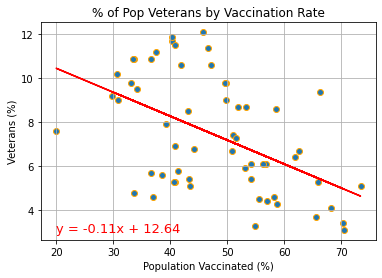

In [16]:
#
yValueScatter = county_df["Civilian population 18 years and over: % Civilian Veterans"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% of Pop Veterans by Vaccination Rate", "Population Vaccinated (%)", "Veterans (%)", (20,3))

R-squared = -0.67


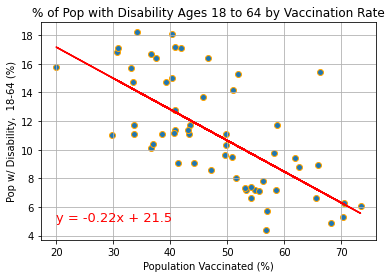

In [17]:
#
yValueScatter = county_df["% CIVILIAN NONINSTITUTIONALIZED POPULATION!!18 to 64 years!!With a disability"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% of Pop with Disability Ages 18 to 64 by Vaccination Rate", "Population Vaccinated (%)", "Pop w/ Disability,  18-64 (%)", (20,5))

R-squared = -0.61


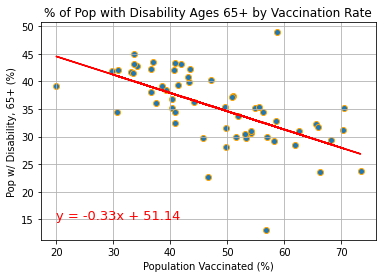

In [18]:
#% of Pop with Disability Ages 65+
yValueScatter = county_df["% CIVILIAN NONINSTITUTIONALIZED POPULATION!!65 years and over!!With a disability"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% of Pop with Disability Ages 65+ by Vaccination Rate", "Population Vaccinated (%)", "Pop w/ Disability, 65+ (%)", (20,15))

R-squared = 0.47


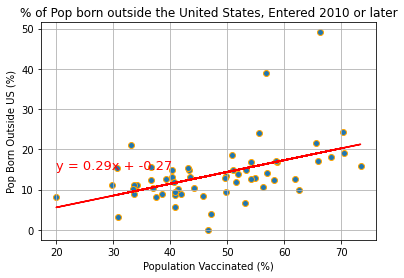

In [19]:
#% of Pop born outside the United States, Entered 2010 or later
yValueScatter = county_df["% Population born outside the United States, Entered 2010 or later"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% of Pop born outside the United States, Entered 2010 or later", "Population Vaccinated (%)", "Pop Born Outside US (%)", (20,15))

R-squared = -0.1


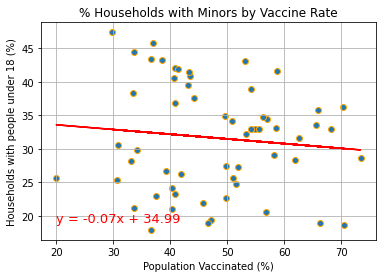

In [20]:
#Household scatter series
yValueScatter = county_df["Household with one or more people under 18"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% Households with Minors by Vaccine Rate", "Population Vaccinated (%)", "Households with people under 18 (%)", (20,19))

R-squared = -0.14


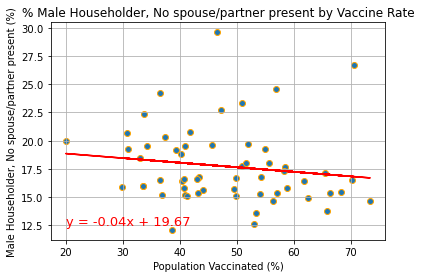

In [21]:
#Household scatter series
yValueScatter = county_df["Male Householder, No spouse/partner present"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% Male Householder, No spouse/partner present by Vaccine Rate", "Population Vaccinated (%)", "Male Householder, No spouse/partner present (%)", (20,12.5))

R-squared = -0.31


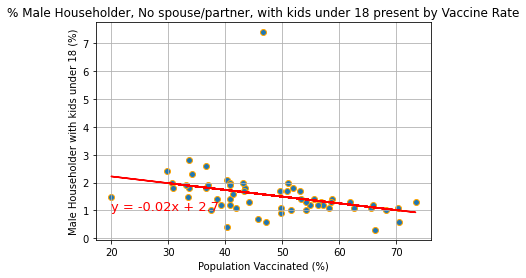

In [22]:
#Household scatter series
yValueScatter = county_df["Male Householder, No spouse/partner present, with children under 18"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% Male Householder, No spouse/partner, with kids under 18 present by Vaccine Rate", "Population Vaccinated (%)", "Male Householder with kids under 18 (%)", (20,1))

R-squared = 0.12


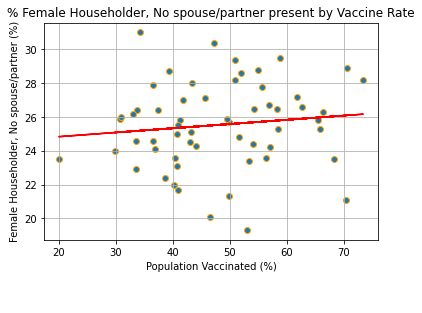

In [23]:
#Household scatter series
yValueScatter = county_df["Female Householder, No spouse/partner present"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% Female Householder, No spouse/partner present by Vaccine Rate", "Population Vaccinated (%)", "Female Householder, No spouse/partner (%)", (20,15))

R-squared = -0.35


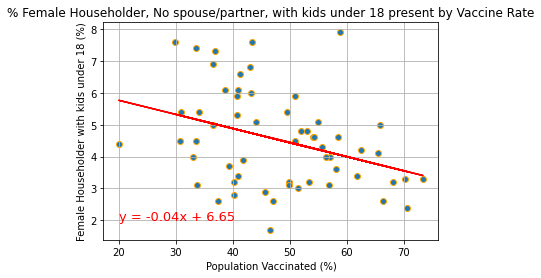

In [24]:
#Household scatter series
yValueScatter = county_df["Female Householder, No spouse/partner present, with children under 18"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% Female Householder, No spouse/partner, with kids under 18 present by Vaccine Rate", "Population Vaccinated (%)", "Female Householder with kids under 18 (%)", (20,2))

R-squared = -0.17


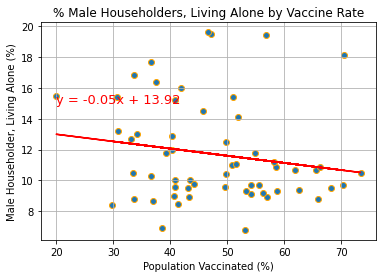

In [25]:
#Household scatter series
yValueScatter = county_df["Male Householder, Living Alone"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% Male Householders, Living Alone by Vaccine Rate", "Population Vaccinated (%)", "Male Householder, Living Alone (%)", (20,15))

R-squared = 0.18


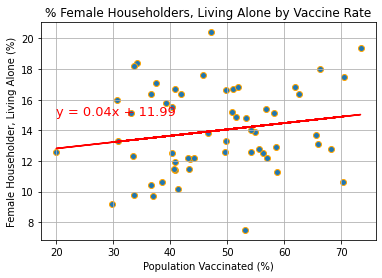

In [26]:
#Household scatter series
yValueScatter = county_df["Female Householder, Living Alone"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% Female Householders, Living Alone by Vaccine Rate", "Population Vaccinated (%)", "Female Householder, Living Alone (%)", (20,15))

R-squared = -0.33


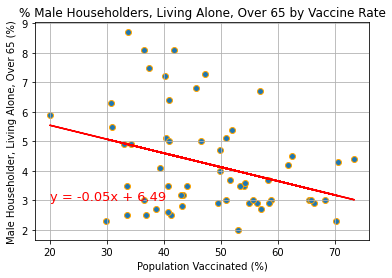

In [27]:
#Household scatter series
yValueScatter = county_df["Male Householder, Living Alone, Over 65"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% Male Householders, Living Alone, Over 65 by Vaccine Rate", "Population Vaccinated (%)", "Male Householder, Living Alone, Over 65 (%)", (20,3))

R-squared = 0.09


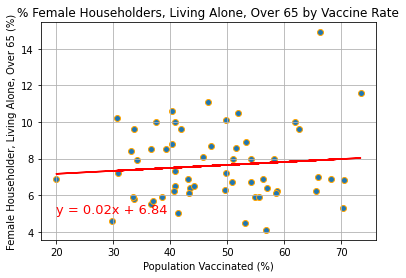

In [28]:
#Household scatter series
yValueScatter = county_df["Female Householder, Living Alone, Over 65"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% Female Householders, Living Alone, Over 65 by Vaccine Rate", "Population Vaccinated (%)", "Female Householder, Living Alone, Over 65 (%)", (20,5))

R-squared = -0.09


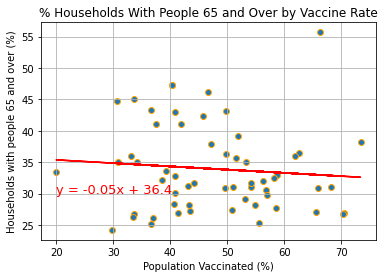

In [29]:
#Household scatter series
yValueScatter = county_df["Households with one or more people 65 and over"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% Households With People 65 and Over by Vaccine Rate", "Population Vaccinated (%)", "Households with people 65 and over (%)", (20,30))

R-squared = -0.16


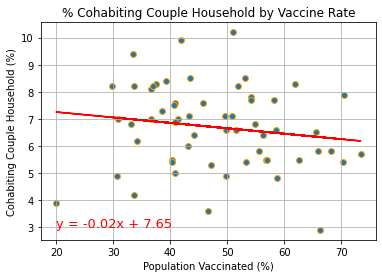

In [30]:
#Household scatter series
yValueScatter = county_df["Cohabiting Couple Household"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% Cohabiting Couple Household by Vaccine Rate", "Population Vaccinated (%)", "Cohabiting Couple Household (%)", (20,3))

R-squared = -0.35


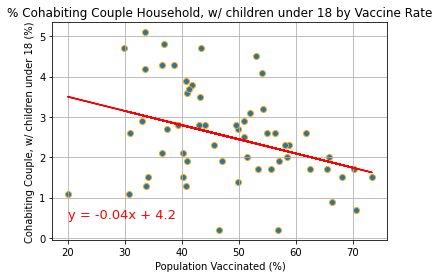

In [31]:
#Household scatter series
yValueScatter = county_df["Cohabiting Couple Household, with children under 18"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% Cohabiting Couple Household, w/ children under 18 by Vaccine Rate", "Population Vaccinated (%)", "Cohabiting Couple, w/ children under 18 (%)", (20,.5))

R-squared = 0.08


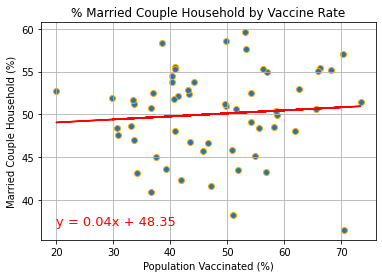

In [32]:
#Household scatter series
yValueScatter = county_df["Married Couple Household"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% Married Couple Household by Vaccine Rate", "Population Vaccinated (%)", "Married Couple Household (%)", (20,37))

R-squared = 0.15


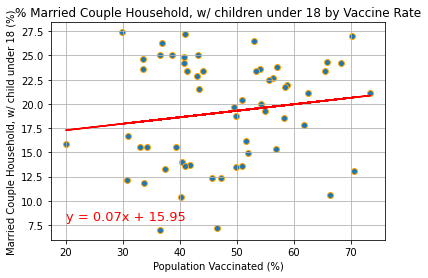

In [33]:
#Household scatter series
yValueScatter = county_df["Married Couple Household, with children under 18"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% Married Couple Household, w/ children under 18 by Vaccine Rate", "Population Vaccinated (%)", "Married Couple Household, w/ child under 18 (%)", (20,8))

No handles with labels found to put in legend.


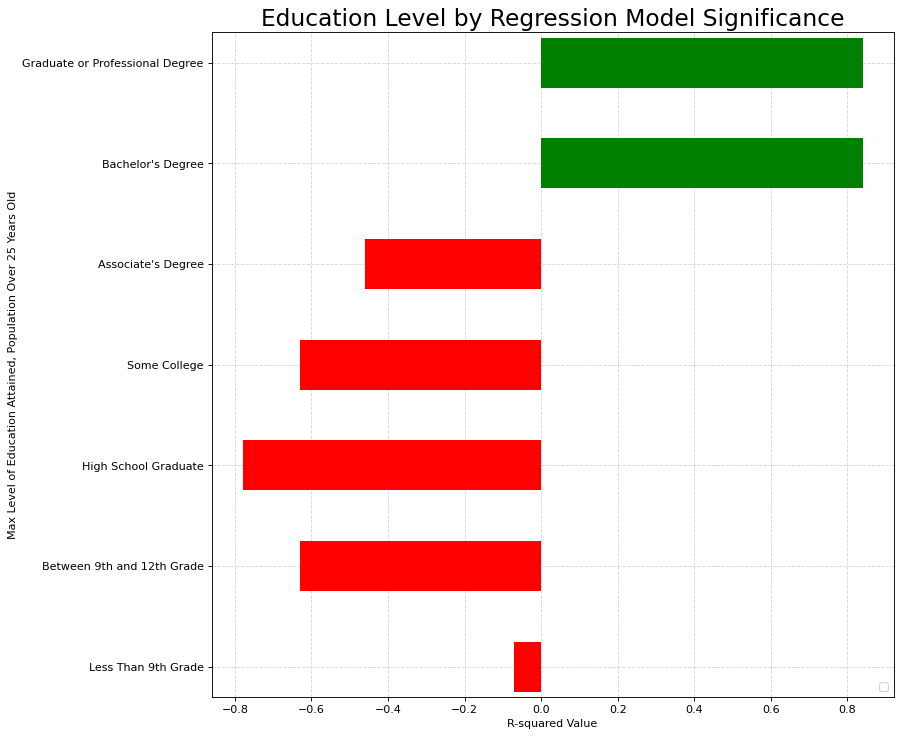

In [34]:
barData_df = pd.DataFrame = {"yLabel" : ["Less Than 9th Grade", "Between 9th and 12th Grade","High School Graduate", "Some College", "Associate's Degree","Bachelor's Degree", "Graduate or Professional Degree" ]  }

barData_df["r"] = [-.07, -.63, -.78, -.63, -.46, .84, .84]

barData_df["color"] = ["red", "red", "red", "red", "red", "green", "green"]

#barData_df.reset_index(inplace=True)

plt.figure(figsize=(11,11), dpi=80)

plt.hlines(y = barData_df["yLabel"], xmin = 0, xmax = barData_df["r"], color = barData_df["color"], linewidth=45)

plt.grid(linestyle='--', alpha=0.5)

plt.title('Education Level by Regression Model Significance', fontdict={'size': 21})

plt.ylabel("Max Level of Education Attained, Population Over 25 Years Old")
plt.xlabel("R-squared Value")
plt.legend(loc = "lower right")#"Negative Effect on Vaccination Rate", "Positive Effect on Vaccination Rate")

R-squared = 0.83


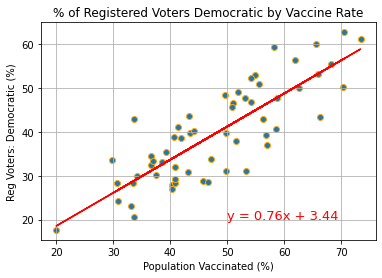

In [59]:
#Household scatter series
yValueScatter = county_df["% of Reg Voters: Democratic"]

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% of Registered Voters Democratic by Vaccine Rate", "Population Vaccinated (%)", "Reg Voters: Democratic (%)", (50,20))

R-squared = -0.83


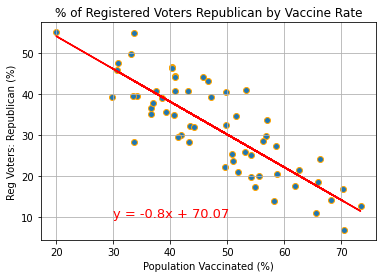

In [60]:
#Household scatter series
yValueScatter = county_df["% of Reg Voters: Republican"]

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% of Registered Voters Republican by Vaccine Rate", "Population Vaccinated (%)", "Reg Voters: Republican (%)", (30,10))

R-squared = -0.72


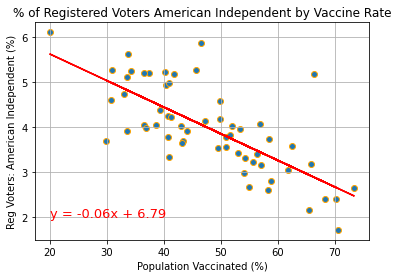

In [62]:
#Household scatter series
yValueScatter = county_df["% of Reg Voters: American Independent"]

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% of Registered Voters American Independent by Vaccine Rate", "Population Vaccinated (%)", "Reg Voters: American Independent (%)", (20,2))

R-squared = 0.22


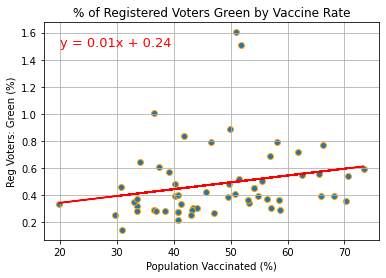

In [64]:
#Household scatter series
yValueScatter = county_df["% of Reg Voters: Green"]

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% of Registered Voters Green by Vaccine Rate", "Population Vaccinated (%)", "Reg Voters: Green (%)", (20,1.5))

R-squared = -0.45


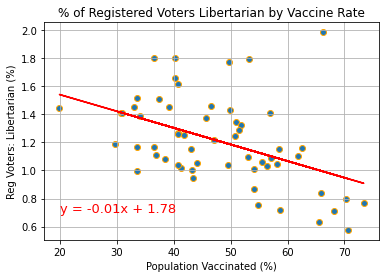

In [67]:
#Household scatter series
yValueScatter = county_df["% of Reg Voters: Libertarian"]

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% of Registered Voters Libertarian by Vaccine Rate", "Population Vaccinated (%)", "Reg Voters: Libertarian (%)", (20,.7))

R-squared = -0.39


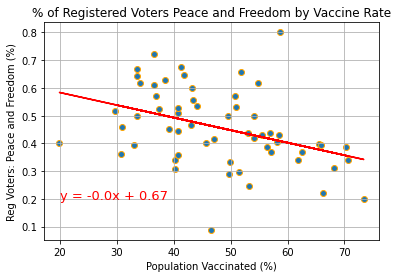

In [69]:
#Household scatter series
yValueScatter = county_df["% of Reg Voters: Peace and Freedom"]

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% of Registered Voters Peace and Freedom by Vaccine Rate", "Population Vaccinated (%)", "Reg Voters: Peace and Freedom (%)", (20,.2))

R-squared = 0.54


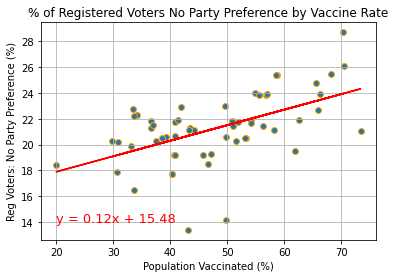

In [74]:
#Household scatter series
yValueScatter = county_df["% of Reg Voters: No Party Preference"]

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% of Registered Voters No Party Preference by Vaccine Rate", "Population Vaccinated (%)", "Reg Voters: No Party Preference (%)", (20,14))

Text(0.5, 0, 'R-squared Value')

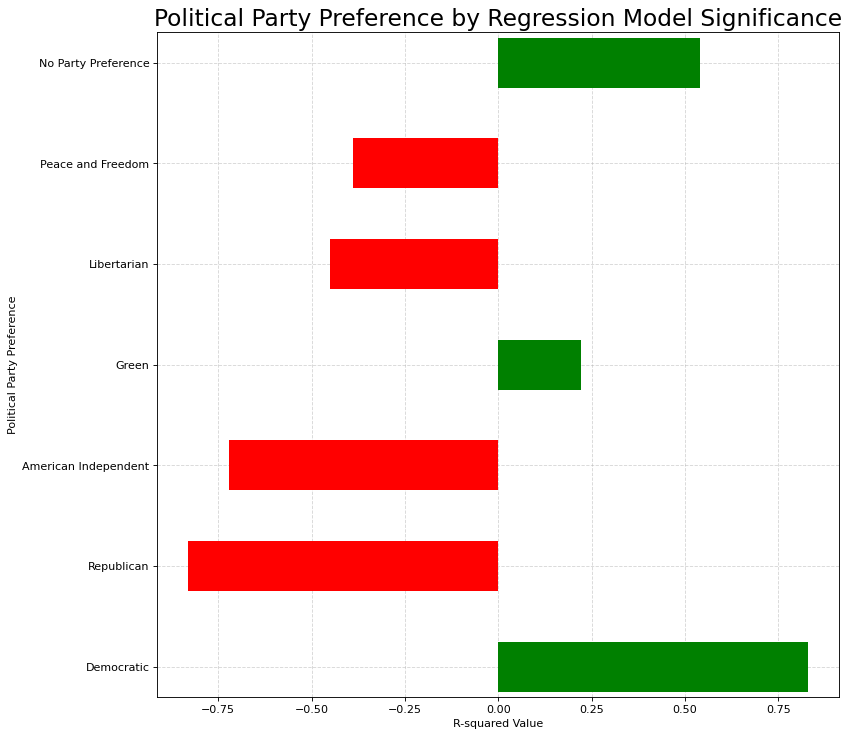

In [76]:
barData_df = pd.DataFrame = {"yLabel" : ["Democratic", "Republican", "American Independent", "Green", "Libertarian","Peace and Freedom", "No Party Preference" ]  }

barData_df["r"] = [.83, -.83, -.72, .22, -.45, -.39, .54]

barData_df["color"] = ["green", "red", "red", "green", "red", "red", "green"]

#barData_df.reset_index(inplace=True)

plt.figure(figsize=(11,11), dpi=80)

plt.hlines(y = barData_df["yLabel"], xmin = 0, xmax = barData_df["r"], color = barData_df["color"], linewidth=45)

plt.grid(linestyle='--', alpha=0.5)

plt.title('Political Party Preference by Regression Model Significance', fontdict={'size': 21})

plt.ylabel("Political Party Preference")
plt.xlabel("R-squared Value")